 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [375]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [376]:
# Reading whale returns

Whale_return_file_path = Path('../Starter_Code/Resources/whale_returns.csv')

Whale_return_df = pd.read_csv(Whale_return_file_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

Whale_return_df.sort_index( inplace= True)
Whale_return_df.sample(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2016-05-19,-0.007958,-0.008679,0.014543,-0.008500
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758
2018-11-23,0.001720,-0.000739,-0.001131,-0.009680
2016-09-16,-0.004822,-0.000676,-0.002315,0.000991
2018-02-08,-0.026591,-0.023493,-0.029651,-0.044806
2018-12-13,-0.006231,-0.005056,0.000476,-0.004340
2017-03-17,0.001091,-0.002989,-0.007236,0.000266
2018-09-11,0.001953,-0.004287,0.007189,0.006222
2017-03-23,0.006461,0.002517,-0.000713,0.005890


In [377]:
# Count nulls

Whale_return_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [378]:
# Drop nulls

Whale_return_df = Whale_return_df.dropna()


In [379]:
Whale_return_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [380]:
# Reading algorithmic returns

algo_returns_path = Path('../Starter_Code/Resources/algo_returns.csv')

algo_returns_df = pd.read_csv(algo_returns_path, index_col = 'Date' ,  parse_dates=True, infer_datetime_format=True )

algo_returns_df.sort_index(inplace= True)

In [381]:
# Count nulls

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [382]:
# Drop nulls

algo_returns_df = algo_returns_df.dropna()

In [383]:
#Null values 

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [384]:
# Reading S&P 500 Closing Prices

spy_path = Path("../Starter_Code/Resources/sp500_history.csv")

spy_df = pd.read_csv(spy_path, index_col = 'Date' , parse_dates = True, infer_datetime_format= True )

spy_df.sort_index(inplace= True)

In [385]:
# Check Data Types

spy_df.dtypes

Close    object
dtype: object

In [386]:
# Fix Data Types

spy_df['Close'] = spy_df['Close'].str.replace("$", "")

spy_df['Close'] = spy_df['Close'].astype(float)


/var/folders/6g/wkdk3lt10mn9t1zb9h9h4xk40000gn/T/ipykernel_1142/347190276.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  spy_df['Close'] = spy_df['Close'].str.replace("$", "")


In [387]:
# Calculate Daily Returns

#### First Mehtods ####

#spy_daily_return = (spy_df - spy_df.shift(1)) /spy_df.shift(1)

#### Second Method ###

spy_daily_return = spy_df.pct_change()

spy_daily_return

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [388]:
# Drop nulls

spy_daily_return = spy_daily_return.dropna()

In [389]:
# Rename `Close` Column to be specific to this portfolio.

spy_daily_return = spy_daily_return.rename(columns = {

'Close': 'S&P 500'

})

In [390]:
#Print with rename

spy_daily_return

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [391]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_daily_return = pd.concat([spy_daily_return, algo_returns_df, Whale_return_df ], join = "inner", axis = 'columns')

combined_daily_return.sort_index(inplace= True)

In [392]:
#print combined return

combined_daily_return

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


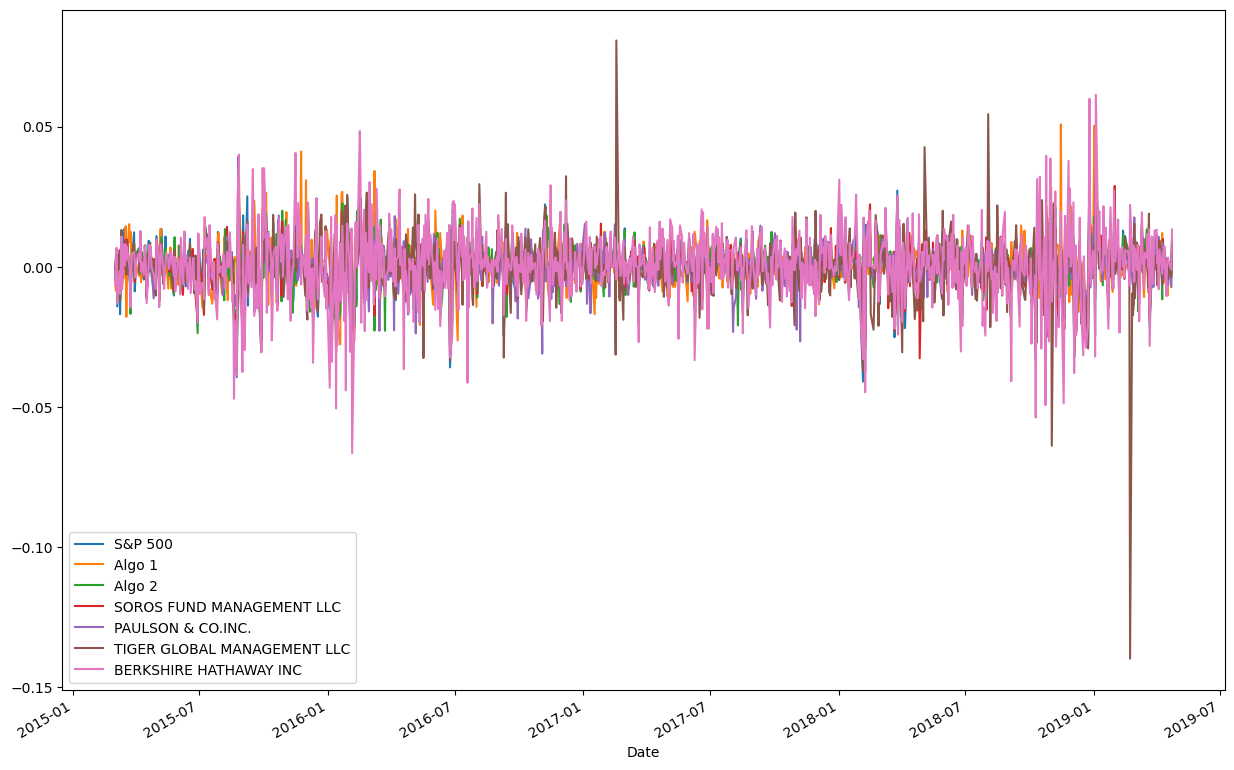

In [393]:
# Plot daily returns of all portfolios

combined_daily_return.plot(figsize= (15,10))

combined_daily_return

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

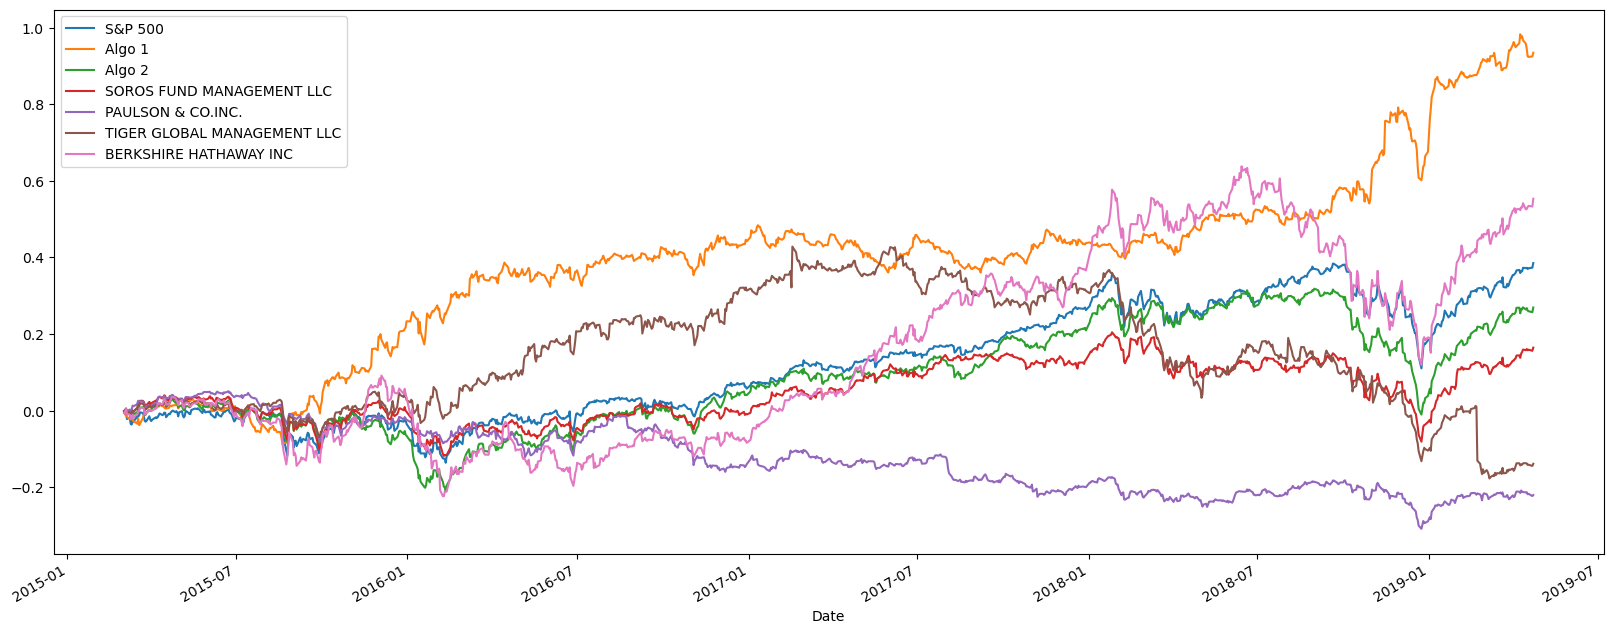

In [394]:
# Calculate cumulative returns of all portfolios


cumulative_returns = ((1 + combined_daily_return).cumprod() -1).sort_index()

cumulative_returns.plot(figsize= (20,8))

In [395]:
# Max and Min for validation

cumulative_returns.max(),cumulative_returns.min()

(S&P 500                        0.385517
 Algo 1                         0.982997
 Algo 2                         0.318465
 SOROS FUND MANAGEMENT LLC      0.204573
 PAULSON & CO.INC.              0.050682
 TIGER GLOBAL MANAGEMENT LLC    0.428464
 BERKSHIRE HATHAWAY INC         0.638119
 dtype: float64,
 S&P 500                       -0.136163
 Algo 1                        -0.088137
 Algo 2                        -0.211400
 SOROS FUND MANAGEMENT LLC     -0.118299
 PAULSON & CO.INC.             -0.308636
 TIGER GLOBAL MANAGEMENT LLC   -0.177201
 BERKSHIRE HATHAWAY INC        -0.223768
 dtype: float64)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

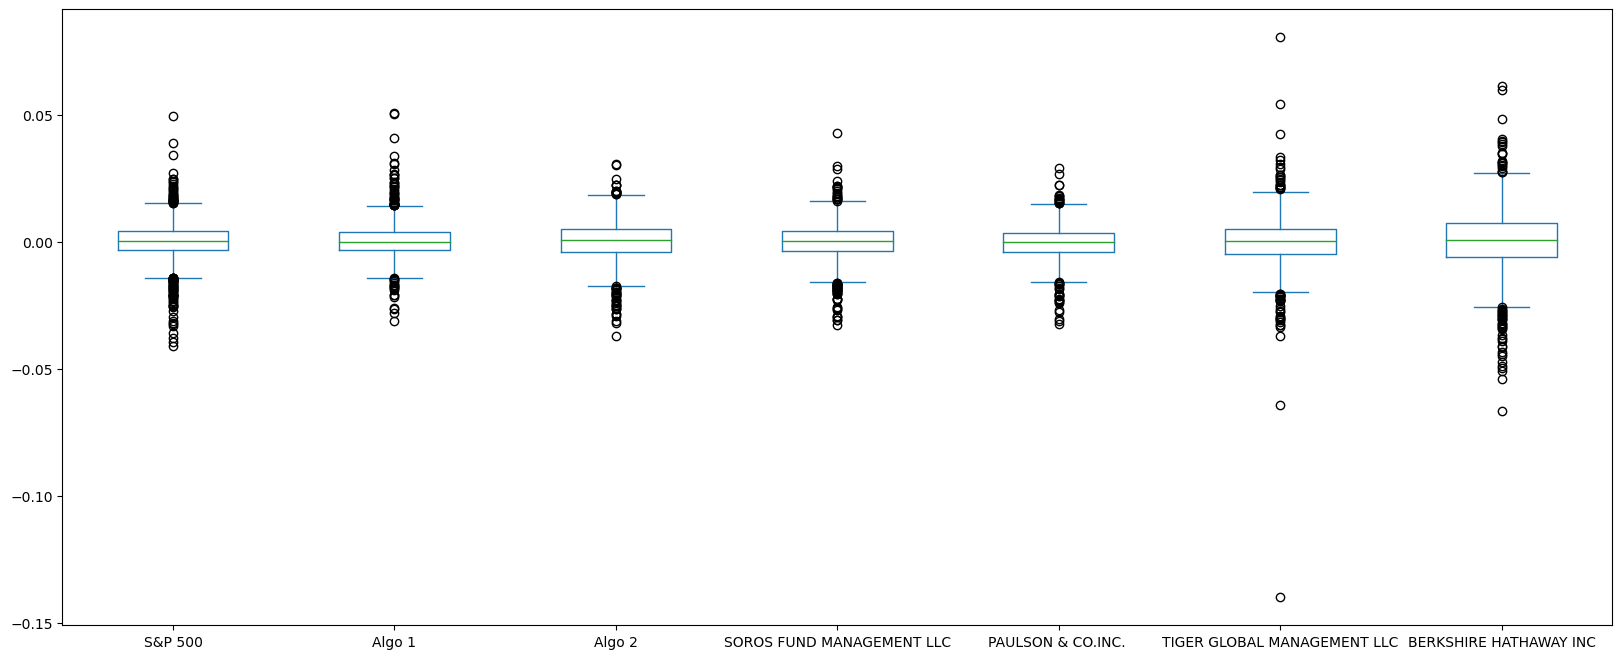

In [396]:
# Box plot to visually show risk

combined_daily_return.plot.box(figsize = (20,8))

### Calculate Standard Deviations

In [397]:
# Calculate the daily standard deviations of all portfolios

portfolios_std = combined_daily_return.std().sort_index()

portfolios_std.sort_values( ascending= False , inplace= True)

portfolios_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [398]:
# Calculate  the daily standard deviation of S&P 500
# I slashed the dates to get the same time periods as the other portfolios 

spy_daily_return_std = (spy_daily_return.loc['2015-03-03 ': '2019-04-22' ].std()).sort_index()

# Determine which portfolios are riskier than the S&P 500

# In Mark Down explain why, the riskier portfolios are BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC  beacuse thehy have a hieger std, meaning more volatility 


spy_daily_return_std

S&P 500    0.008554
dtype: float64

### Calculate the Annualized Standard Deviation

In [399]:
# Calculate the annualized standard deviation (252 trading days)

portfolios_std_annual = (portfolios_std * np.sqrt(252))
 
portfolios_std_annual.sort_values(ascending= False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':' 21 Days Rolling Standart Deviation'}, xlabel='Date'>

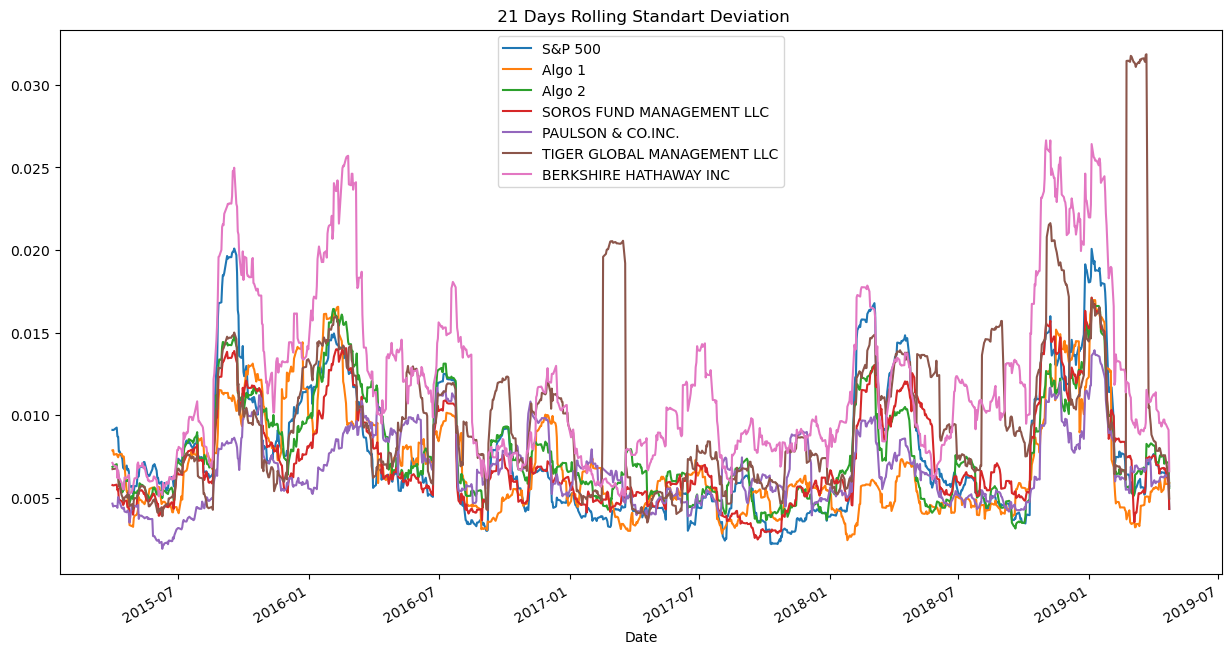

In [400]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

portfolios_rolling_21_std = combined_daily_return.rolling(window = 21).std()


#################### Note for self ##################################

# this code will so the same witouth using the window: 
# portfolios_rolling_21_std = combined_daily_return.rolling(21).std()

######################################################################

# Plot the rolling standard deviation

portfolios_rolling_21_std.plot(figsize= (15,8), title= " 21 Days Rolling Standart Deviation")

### Calculate and plot the correlation

In [401]:
# Calculate the correlation

portfolios_correlation = combined_daily_return.corr()

# Display de correlation matrix

portfolios_correlation

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P 500,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [402]:
# Calculate covariance of a single portfolio
# Calculating the Covariance of BERKSHIRE HATHAWAY INC using the S&P as benchmark

brk_covariance = combined_daily_return['BERKSHIRE HATHAWAY INC'].cov(combined_daily_return['S&P 500'])

print('BERKSHIRE HATHAWAY INC', "covariance is ", brk_covariance)

BERKSHIRE HATHAWAY INC covariance is  8.302834941861666e-05


In [403]:
# Calculate variance of S&P 500

spy_variance = combined_daily_return['S&P 500'].var()

spy_variance



7.316632424648712e-05

<AxesSubplot:xlabel='Date'>

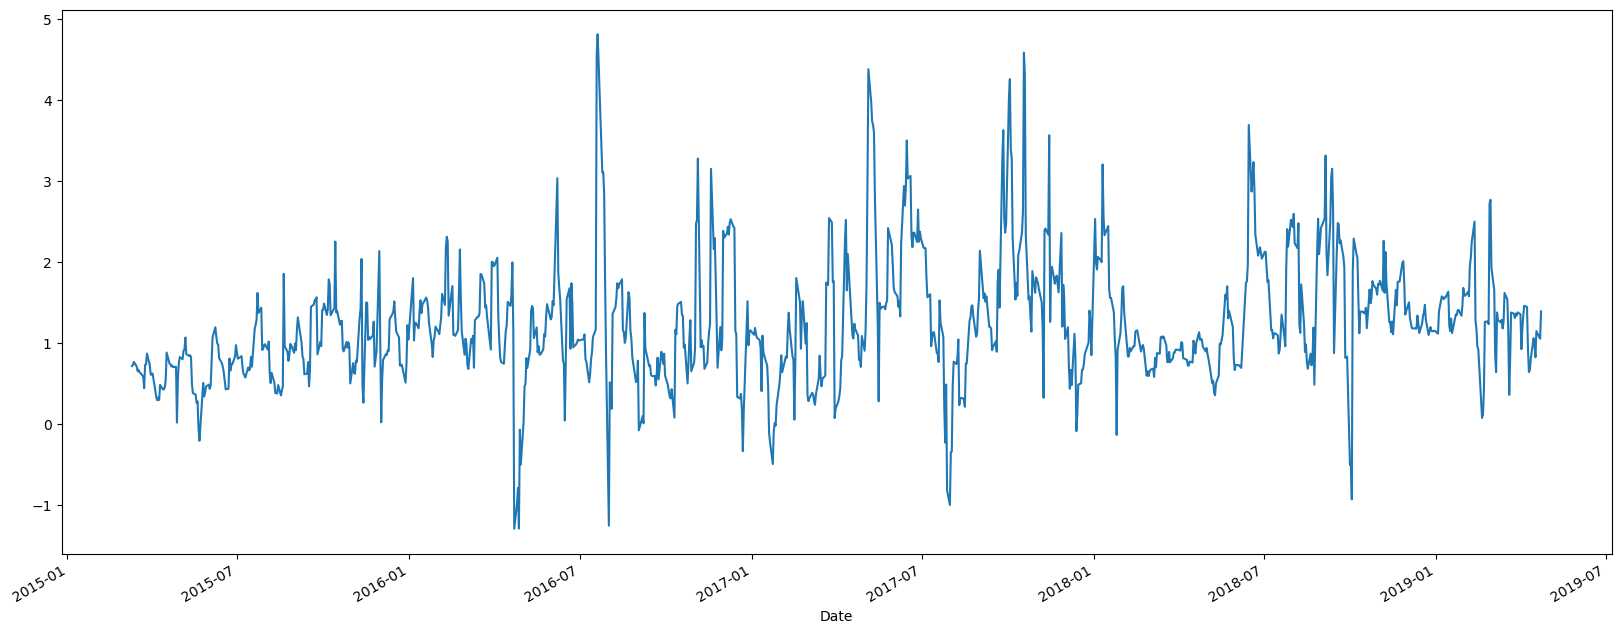

In [404]:
# Computing beta
brk_beta = brk_covariance/spy_variance

# Plot beta trend
# to compute the beta trend we have to calculate the beta for x amout of time and then plot it usinf rolling statistics 
# i will do it on weekly basis 

Weekly_brk_beta_trend =  combined_daily_return['BERKSHIRE HATHAWAY INC'].rolling(window= 7).cov(combined_daily_return['S&P 500'])/combined_daily_return['S&P 500'].rolling(window = 7).var()

Weekly_brk_beta_trend.plot(figsize= (20,8))


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [405]:
# Use `ewm` to calculate the rolling window

portfolios_ewm_21_std = combined_daily_return.ewm(halflife=21).std()

portfolios_ewm_21_std.tail()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-16,0.007837,0.006922,0.007938,0.007632,0.006846,0.016301,0.011939
2019-04-17,0.007736,0.007097,0.007896,0.007547,0.006846,0.016047,0.011746
2019-04-18,0.007610,0.006984,0.007779,0.007424,0.006737,0.015787,0.011554
2019-04-22,0.007485,0.006870,0.007670,0.007336,0.006764,0.015536,0.011377
2019-04-23,0.007487,0.006804,0.007701,0.007294,0.006682,0.015339,0.011377


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [406]:
# Annualized Sharpe Ratios

#I'm using the S&P 500 as the Risk free rate, but i don't that is appropiate. I consider that the T-bills will actually be better and choosing the one that is closer to your investment time horizon


portfolios_annual_sharpe_ratio = ((combined_daily_return.mean()-combined_daily_return['S&P 500'].mean()) * 252) / (combined_daily_return.std() * np.sqrt(252))

portfolios_annual_sharpe_ratio

S&P 500                        0.000000
Algo 1                         0.650964
Algo 2                        -0.163336
SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

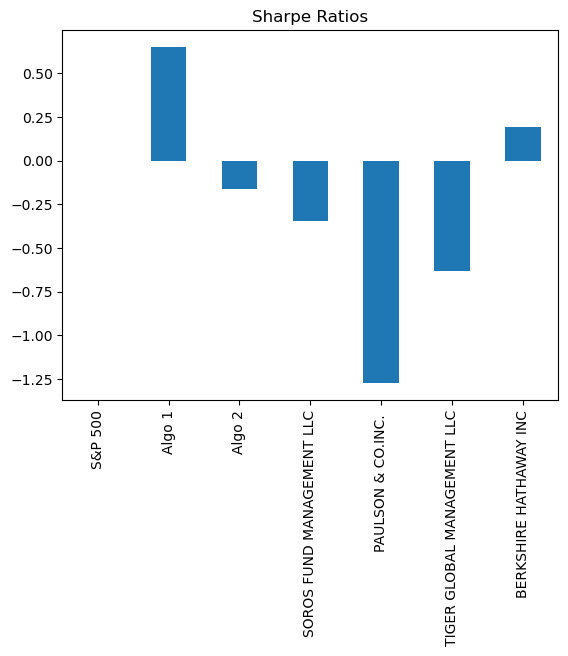

In [407]:
# Visualize the sharpe ratios as a bar plot

portfolios_annual_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [408]:
# Reading data from 1st stock

goog_path = Path('../Starter_Code/Resources/goog_historical.csv')

goog = pd.read_csv(goog_path, index_col = 'Trade DATE' , parse_dates = True, infer_datetime_format= True ).sort_index()


In [409]:
# Reading data from 2nd stock

cost_path = Path('../Starter_Code/Resources/cost_historical.csv')

cost = pd.read_csv(cost_path, index_col = 'Trade DATE' , parse_dates = True, infer_datetime_format= True ).sort_index()

cost.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [410]:
# Reading data from 3rd stock

aapl_path = Path('../Starter_Code/Resources/aapl_historical.csv')
aapl = pd.read_csv(aapl_path, index_col = 'Trade DATE' , parse_dates = True, infer_datetime_format= True ).sort_index()

aapl

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [411]:
# Combine all stocks in a single DataFrame

cost_aapl_goog_df = pd.concat([aapl,cost,goog], join= 'inner' , axis= 'columns',)

cost_aapl_goog_df


,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
...,...,...,...,...,...,...
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10


In [412]:
# Reset Date index

cost_aapl_goog_df.sort_index(inplace= True)

cost_aapl_goog_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
...,...,...,...,...,...,...
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10


In [413]:
# Reorganize portfolio data by having a column per symbol
#Dropping symbol columns
portfolio_aapl_cost_goog = cost_aapl_goog_df.drop(columns= 'Symbol')


In [414]:
#Add symbols per columnd

columns_names = ['AAPL', 'COST', 'GOOG']

portfolio_aapl_cost_goog.columns = columns_names

portfolio_aapl_cost_goog.head(10)



,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
2018-05-18,186.31,198.96,1066.36
2018-05-21,187.63,199.62,1079.58
2018-05-22,187.16,198.97,1069.73
2018-05-23,188.36,198.14,1079.69


In [415]:
# Calculate daily returns

portfolios_stocks_returns = portfolio_aapl_cost_goog.pct_change()

# Drop NAs

portfolios_stocks_returns.dropna(inplace= True)

# Display sample data

#portfolios_stocks_returns.sample(12)
portfolios_stocks_returns


,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


In [416]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return  

portafolio_return = portfolios_stocks_returns.dot(weights)

portafolio_return.sort_index(inplace= True)


# Display sample data


portafolio_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [417]:
# Join your returns DataFrame to the original returns DataFrame

all_portfolios = pd.concat([combined_daily_return,portafolio_return], axis = 'columns' , join= 'inner')

all_portfolios

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,0
2018-05-14,0.000884,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-15,-0.006842,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-16,0.004061,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-17,-0.000856,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-18,-0.002632,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.000340
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,0.009292
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,0.001545
2019-04-22,0.001012,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088,0.001217


In [418]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# There are no NaN Values 

all_portfolios.isnull().sum()


S&P 500                        0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
0                              0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [419]:
# Calculate the annualized `std`

all_portfolios_std = all_portfolios.std().sort_values()

all_portfolios_annual_std = (all_portfolios_std * np.sqrt(252))

all_portfolios_annual_std.sort_values( ascending= False)

BERKSHIRE HATHAWAY INC         0.247155
TIGER GLOBAL MANAGEMENT LLC    0.232531
0                              0.211496
S&P 500                        0.152054
SOROS FUND MANAGEMENT LLC      0.146675
Algo 2                         0.139556
Algo 1                         0.133704
PAULSON & CO.INC.              0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

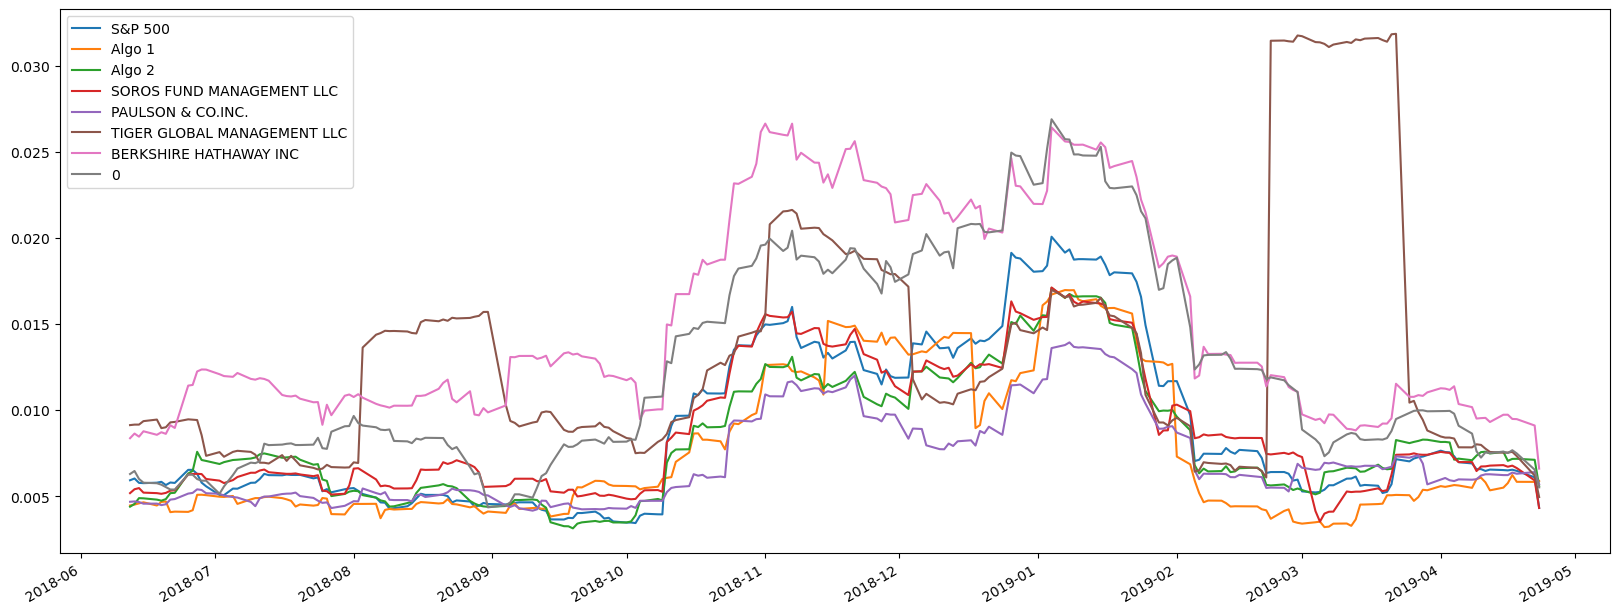

In [420]:
# Calculate rolling standard deviation

all_portfolios_rolling_21_std = all_portfolios.rolling(window = 21).std()


# Plot rolling standard deviation

all_portfolios_rolling_21_std.plot(figsize= (20,8))


### Calculate and plot the correlation

In [421]:
# Calculate and plot the correlation

all_portfolios_correlation = all_portfolios.corr()



### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}>

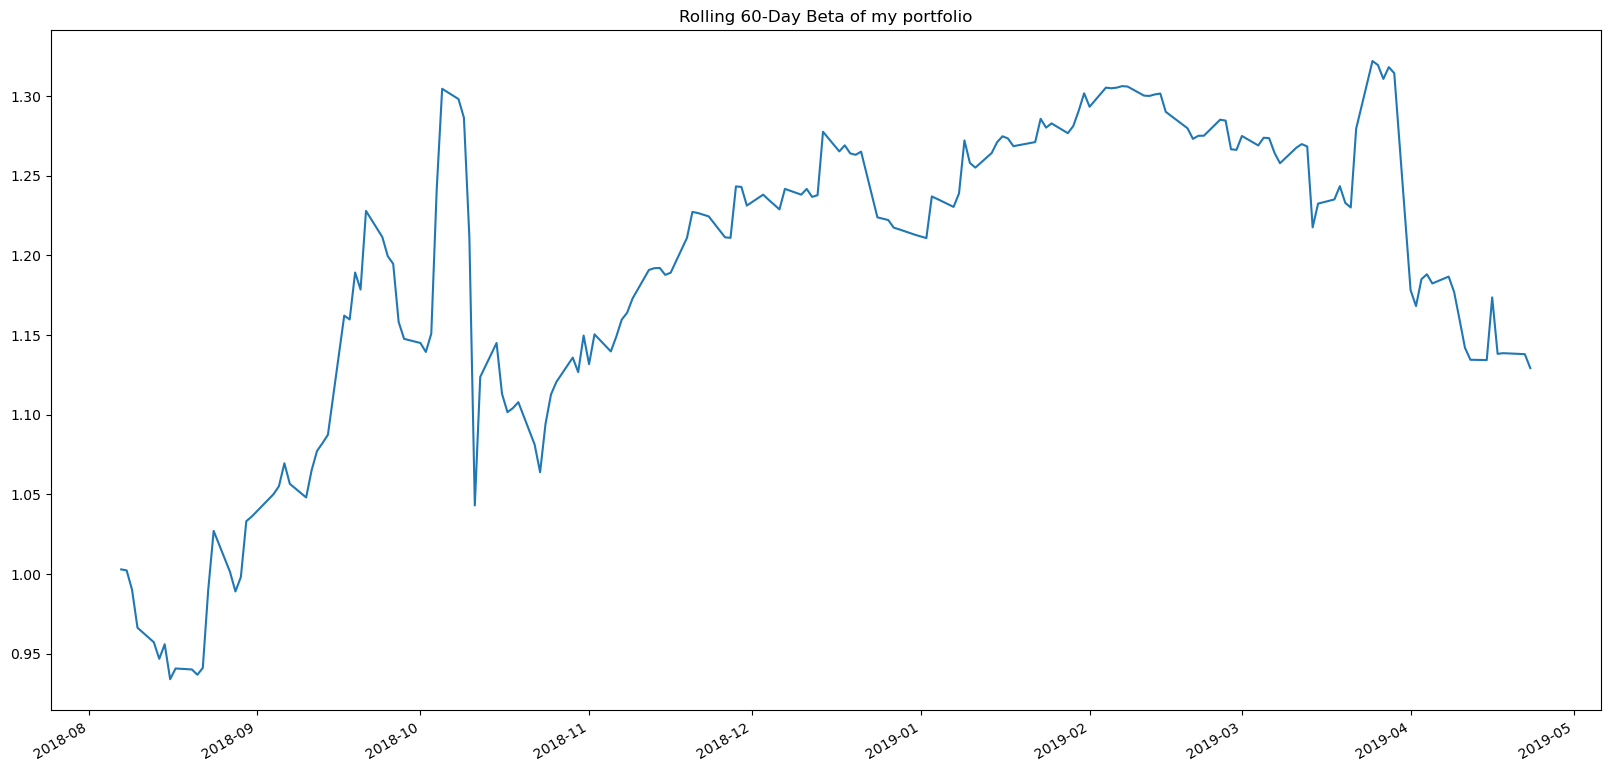

In [422]:
# Calculate and plot Beta

#calculating the 60 days rolling covatriance of my portfolio and the S&P 500 

my_portfolio_60_rolling_covariance = all_portfolios[0].rolling(window=60).cov(all_portfolios['S&P 500'])

#Rolling 60 days variance of the s&P 500 

rolling_variance = all_portfolios['S&P 500'].rolling(window=60).var()

#calculating beta

my_portfolio_rolling_beta = my_portfolio_60_rolling_covariance / rolling_variance

my_portfolio_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [423]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios_my_portfolio = ((all_portfolios.mean()-all_portfolios['S&P 500'].mean()) * 252) / (all_portfolios.std() * np.sqrt(252))

sharpe_ratios_my_portfolio.sort_values(inplace= True)

<AxesSubplot:title={'center':'Sharpe Ratios'}>

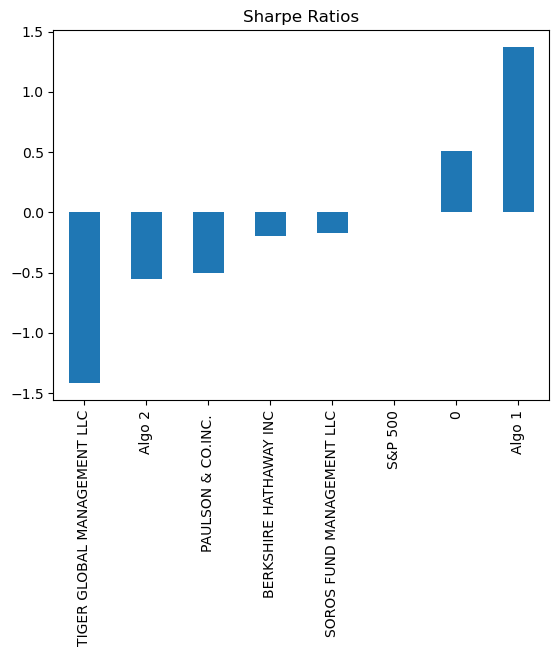

In [424]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios_my_portfolio.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!